<a href="https://colab.research.google.com/github/jyp1111/TIL/blob/master/nlp/CBoW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class cbow:
    def __init__(self,token_ls):
        self.token_ls=token_ls
        self.word_ls=sorted(list(set(self.token_ls)))

    def connected_token(self,token,window_size):
        token_index_ls=[i for i,v in enumerate(self.token_ls) if v==token]
        return_set={self.word_ls.index(v) for i,v in enumerate(self.token_ls) for j in token_index_ls if abs(i-j)<=window_size}-{self.word_ls.index(token)}
        return sorted(list(return_set))

In [ ]:
doc="you will never know unitl you try"
L=doc.split()
L

['you', 'will', 'never', 'know', 'unitl', 'you', 'try']

In [ ]:
X

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [ ]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
n=len(cbow(L).word_ls)
X=[[np.identity(n)[j] for j in cbow(L).connected_token(cbow(L).word_ls[i],2)] for i in range(n)]
X=sum(X,[])
y=[[np.identity(n)[i] for j in cbow(L).connected_token(cbow(L).word_ls[i],2)] for i in range(n)]
y=sum(y,[])
X,y=np.array(X),np.array(y)
X_1=np.column_stack((np.ones(len(X)),X))

In [ ]:
first_layer.shape

(22, 3)

In [ ]:
(hyp-y).shape

(22, 6)

In [ ]:
len(X)

22

In [ ]:
learning_rate=0.1
num_epoch=10000
np.random.seed(0)
hidden_num=3

W_1=np.random.random(size=(n+1,hidden_num))
W_2=np.random.random(size=(hidden_num+1,n))
epoch_ls=[]
loss_ls=[]
for epoch in range(num_epoch):
    first_layer=np.dot(X_1,W_1)
    first_layer_1=np.column_stack((np.ones(len(first_layer)),first_layer))
    output_layer=np.dot(first_layer_1,W_2)
    hyp=(np.exp(output_layer).T/np.exp(output_layer).sum(axis=1)).T
    error=-np.multiply(y,np.log(hyp)).sum()/len(X)
    
    len_neighbor=[len(cbow(L).connected_token(cbow(L).word_ls[j],2)) for j in range(n)]
    arr=np.zeros(n)
    for p,v in enumerate(np.argsort(-hyp)[[sum(len_neighbor[:j]) for j in range(n)]]):
        arr=np.row_stack((arr,np.identity(n)[v<len_neighbor[p]]))
    pred=arr[1:]
    accuracy=(y.argmax(axis=1)==pred.argmax(axis=1)).mean()

    if epoch%200==0:
        print(f"epoch : {epoch} loss : {error}")
        epoch_ls.append(epoch)
        loss_ls.append(error)
    if error<1.1:
        break
    W_1=W_1-np.dot(X_1.T,np.dot(hyp-y,W_2.T).T[1:].T)*learning_rate/len(X)
    W_2=W_2-np.dot(first_layer_1.T,(hyp-y))*learning_rate/len(X)
print(f"epoch : {epoch}, loss : {error}")

epoch : 0 loss : 1.969774975902621
epoch : 200 loss : 1.6708085160251995
epoch : 400 loss : 1.5730775840353837
epoch : 600 loss : 1.5019141337127067
epoch : 800 loss : 1.4505184971956182
epoch : 1000 loss : 1.4242720804071711
epoch : 1200 loss : 1.4138188131645901
epoch : 1400 loss : 1.4087505769750754
epoch : 1600 loss : 1.4058994255967983
epoch : 1800 loss : 1.404125771301845
epoch : 2000 loss : 1.4029386457365747
epoch : 2200 loss : 1.402098969850712
epoch : 2400 loss : 1.4014790050799226
epoch : 2600 loss : 1.4010053398803095
epoch : 2800 loss : 1.4006332405683328
epoch : 3000 loss : 1.400334113017495
epoch : 3200 loss : 1.4000889396409633
epoch : 3400 loss : 1.3998846420899624
epoch : 3600 loss : 1.399711965787585
epoch : 3800 loss : 1.3995641979090323
epoch : 4000 loss : 1.3994363624576998
epoch : 4200 loss : 1.399324699104529
epoch : 4400 loss : 1.399226316518858
epoch : 4600 loss : 1.3991389561713226
epoch : 4800 loss : 1.399060827891815
epoch : 5000 loss : 1.3989904930959252
e

In [ ]:
W_1

array([[-0.19924463, -0.41464559,  0.64039809],
       [ 0.77937319,  1.048742  ,  1.42075043],
       [ 0.97424015,  1.06375243,  2.163525  ],
       [-1.576665  ,  2.67119346,  1.19329817],
       [-0.4617257 , -1.49633458, -0.98678403],
       [ 0.04077361, -1.73337047,  1.18012533],
       [ 2.29518814,  1.23916224, -0.91255415]])

In [ ]:
from itertools import combinations
print([np.dot(v[0],v[1])/np.sqrt(np.dot(v[0],v[0])*np.dot(v[1],v[1])) for v in combinations(W_1,2)])
max([np.dot(v[0],v[1])/np.sqrt(np.dot(v[0],v[0])*np.dot(v[1],v[1])) for v in combinations(W_1,2)])

[0.21005497599386808, 0.365950232409935, -0.011169757839531202, 0.05516412915583467, 0.8866721472873655, -0.7138918322984148, 0.9859609369350479, 0.5094262582649293, -0.9323660559583491, -0.0270271644384737, 0.3359350094516623, 0.4498059107578507, -0.8677567246388092, 0.13735028593681298, 0.21987031937201323, -0.7228474991709438, -0.4714515932768527, -0.1521863626028358, 0.3632970509893396, -0.3936530664634444, -0.5402683785181098]


0.9859609369350479

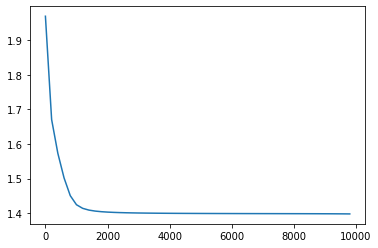

In [ ]:
from matplotlib import pyplot as plt
y=loss_ls
plt.plot(epoch_ls,loss_ls)